In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.data_preprocess import DataPreprocessor
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('data/prod_final.csv')

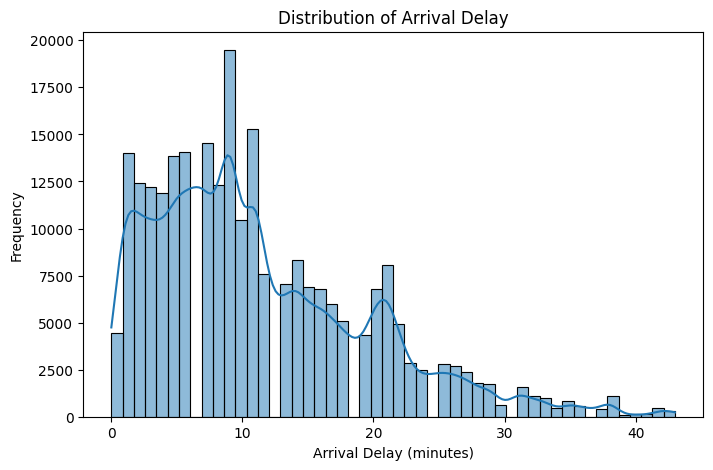

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['ARR_DELAY'].dropna(), bins=50, kde=True)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

In [50]:
delayed_flights = (df['ARR_DELAY'] > 0).mean() * 100
print(f"Percentage of delayed flights: {delayed_flights:.2f}%")


Percentage of delayed flights: 98.24%


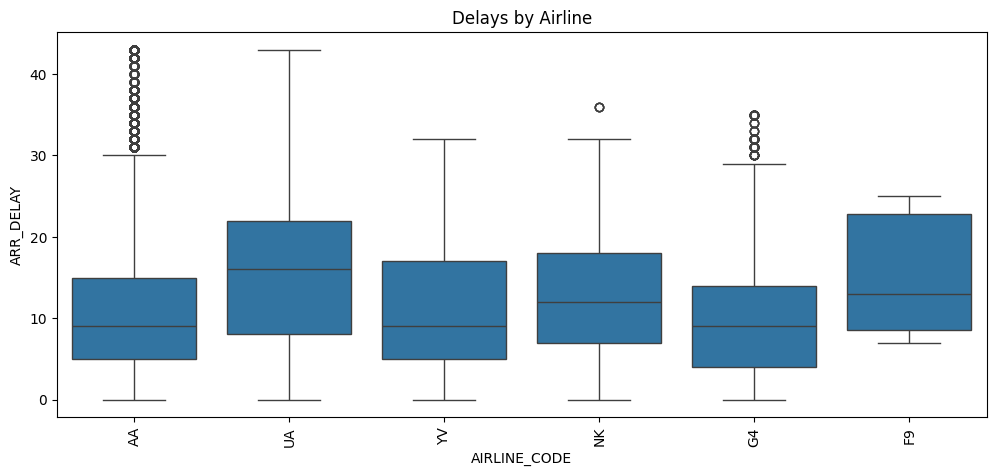

In [51]:
plt.figure(figsize=(12,5))
sns.boxplot(x='AIRLINE_CODE', y='ARR_DELAY', data=df)
plt.xticks(rotation=90)
plt.title("Delays by Airline")
plt.show()


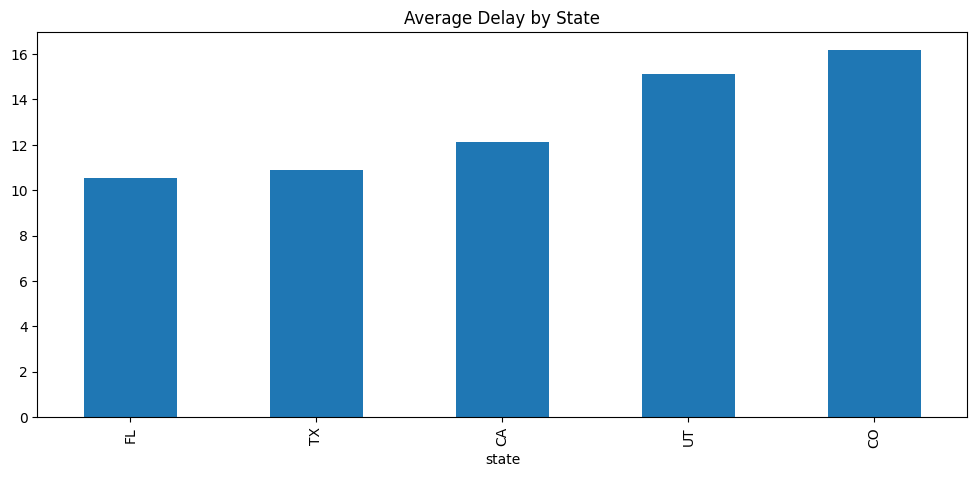

In [52]:
state_delays = df.groupby('state')['ARR_DELAY'].mean().sort_values()
state_delays.plot(kind='bar', figsize=(12,5), title="Average Delay by State")
plt.show()


In [53]:
df.fillna(0, inplace=True)

In [39]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)



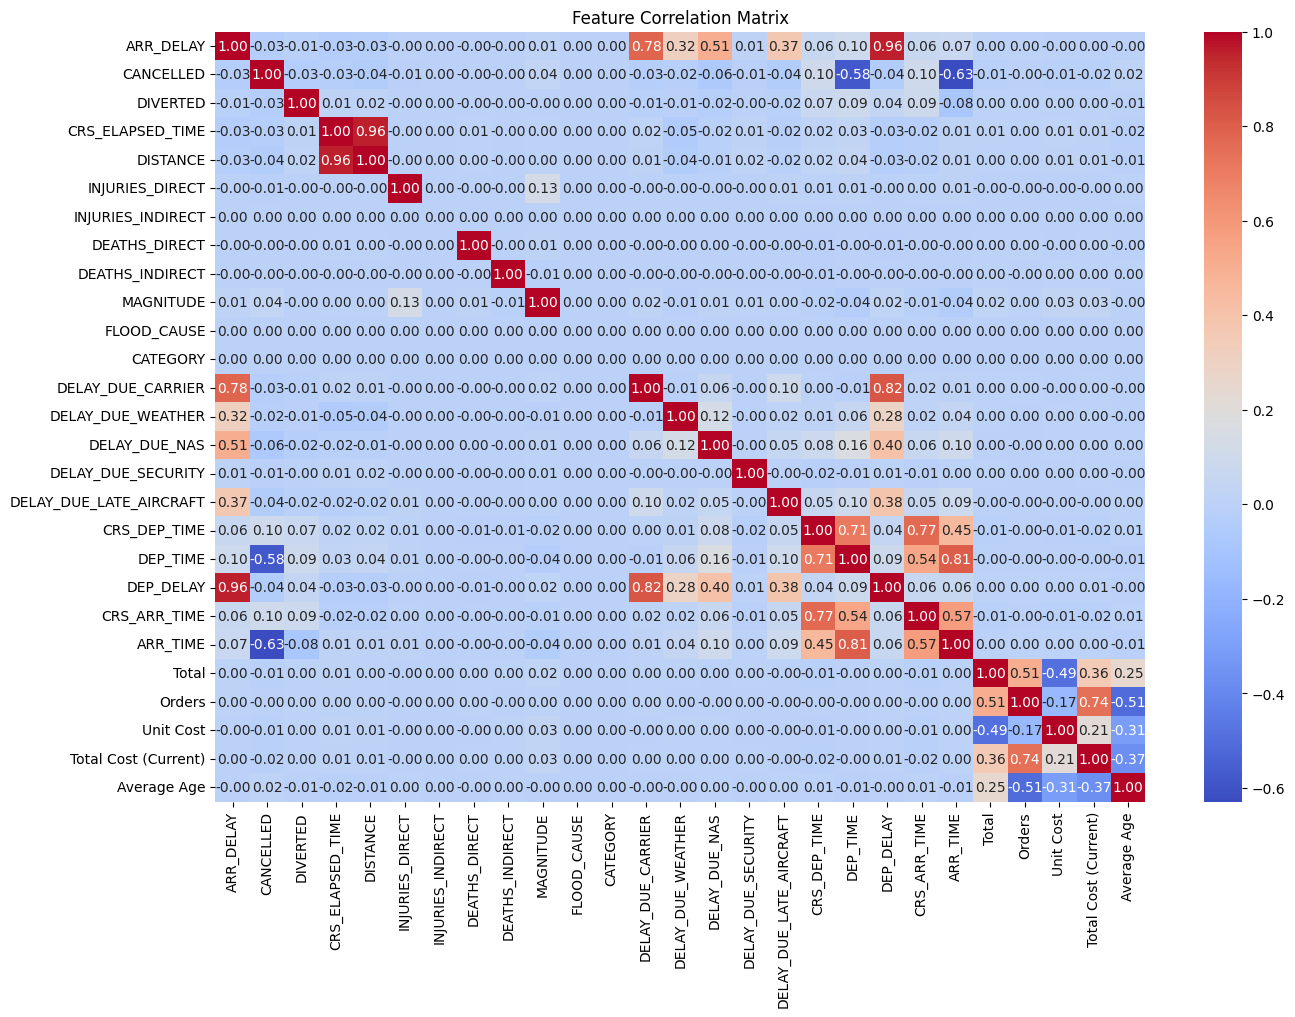

In [41]:
correlation_matrix = scaled_df.corr()
correlation_matrix = correlation_matrix.fillna(0)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [54]:
df.columns

Index(['AIRLINE_CODE', 'state', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'DISTANCE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'IATA', 'Total',
       'Orders', 'Unit Cost', 'Total Cost (Current)', 'Average Age', 'date'],
      dtype='object')

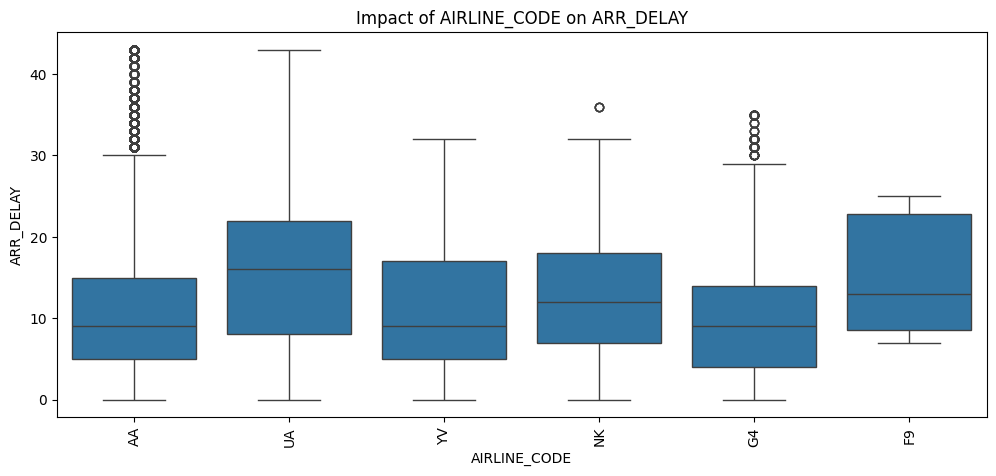

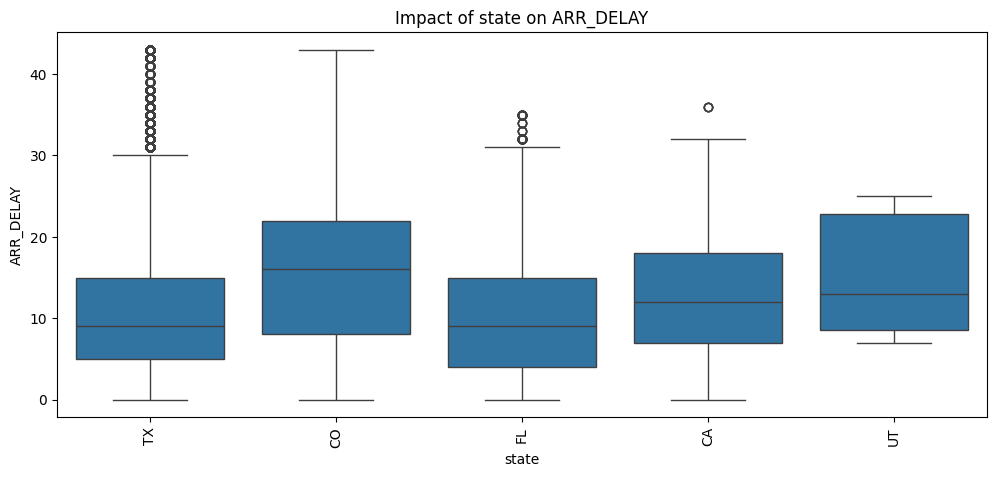

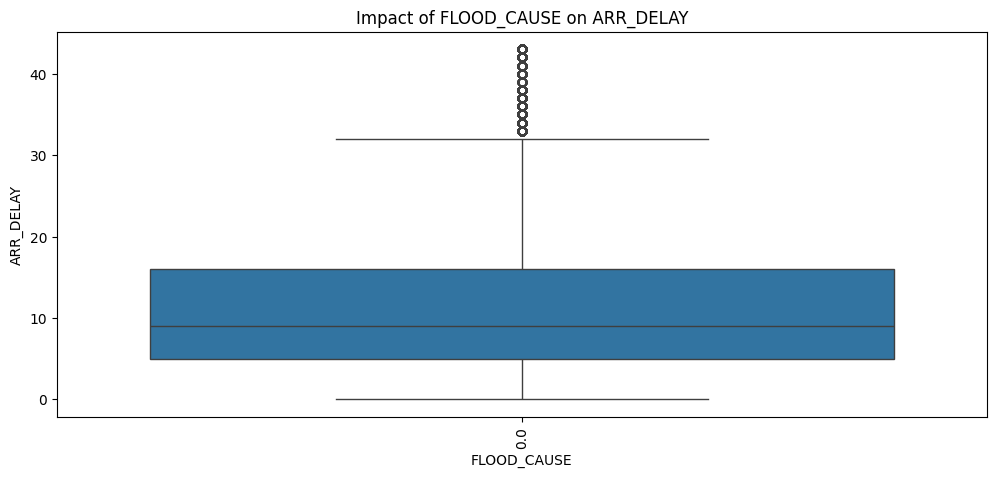

In [57]:
for col in ['AIRLINE_CODE', 'state', 'FLOOD_CAUSE']:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=col, y=df['ARR_DELAY'].abs(), data=df)
    plt.xticks(rotation=90)
    plt.title(f"Impact of {col} on ARR_DELAY")
    plt.show()


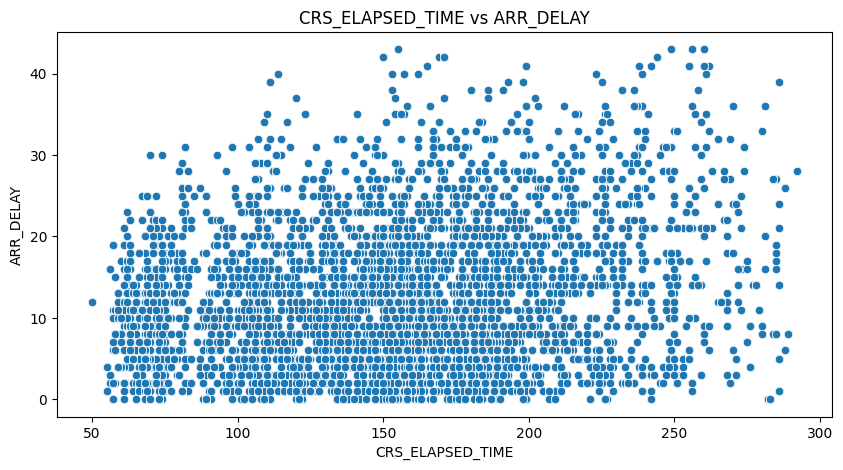

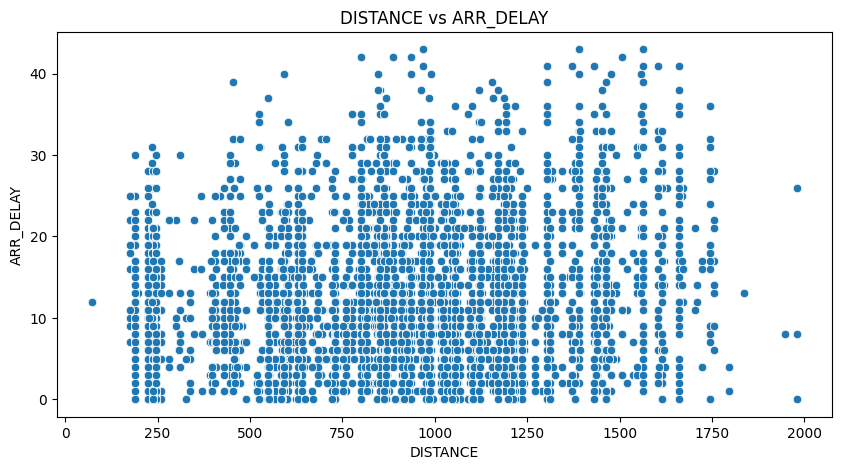

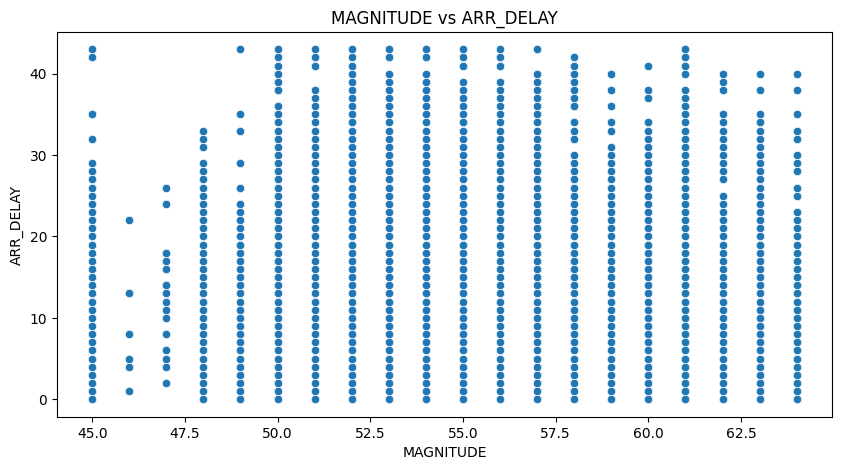

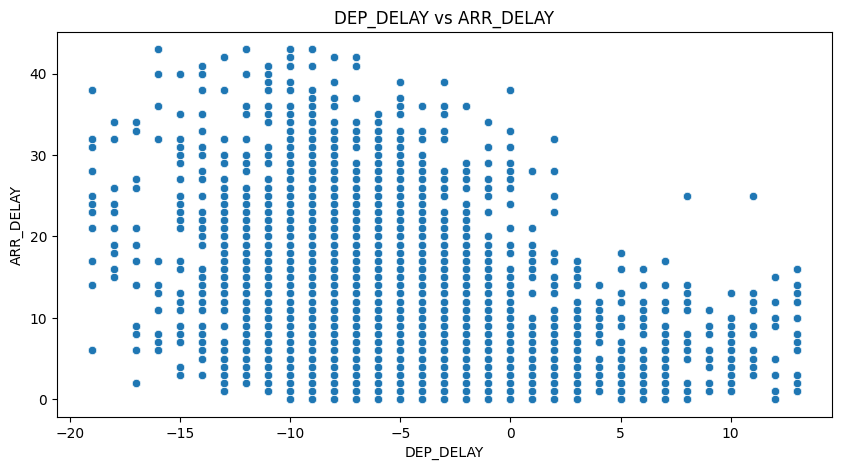

In [58]:
for col in ['CRS_ELAPSED_TIME', 'DISTANCE', 'MAGNITUDE', 'DEP_DELAY']:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=col, y=df['ARR_DELAY'].abs(), data=df)
    plt.title(f"{col} vs ARR_DELAY")
    plt.show()


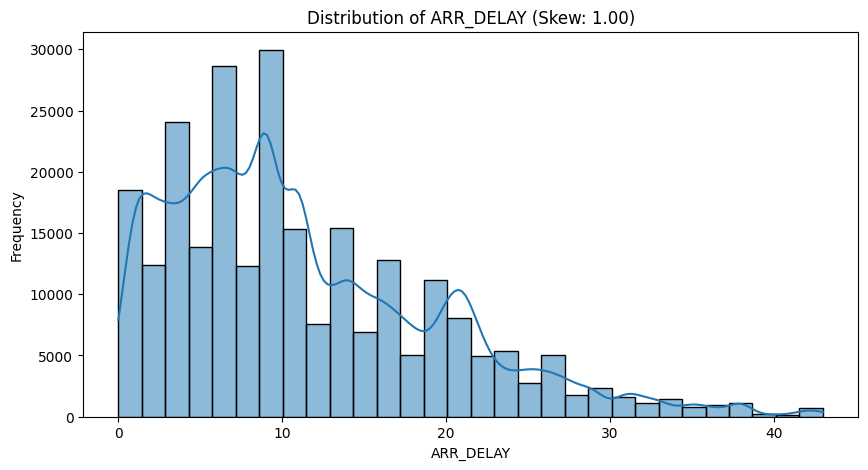

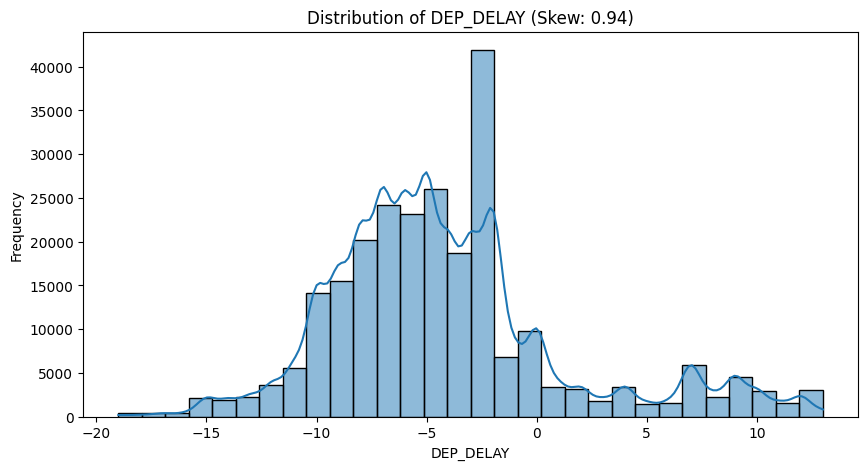

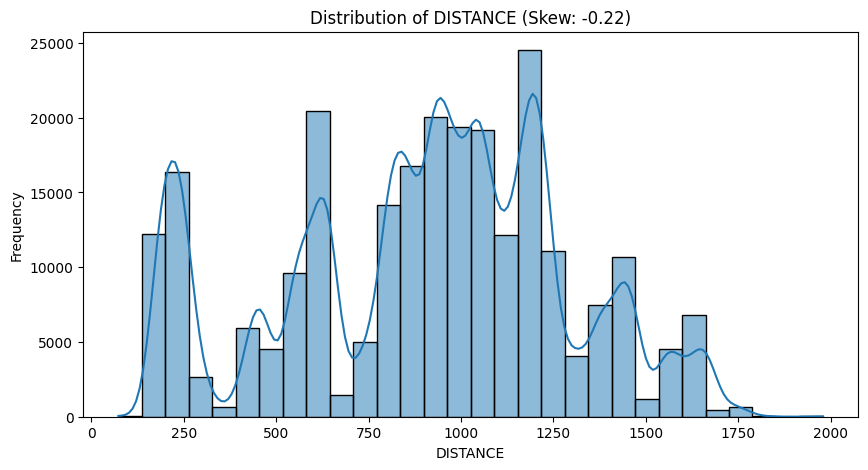

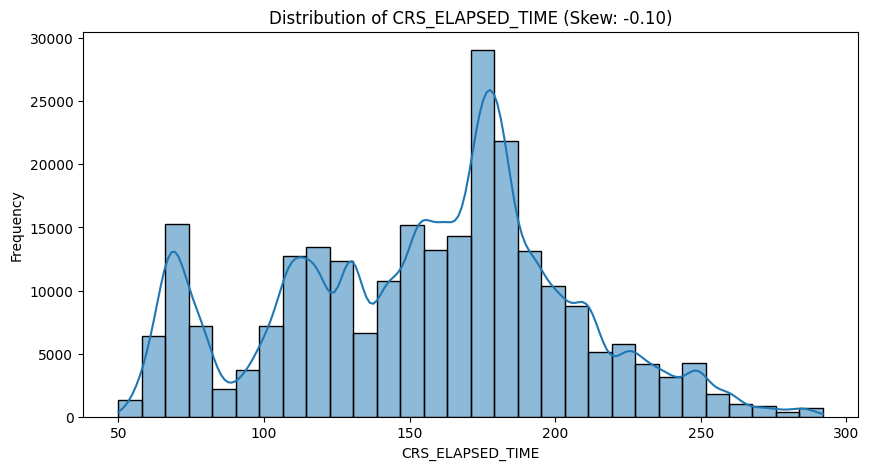

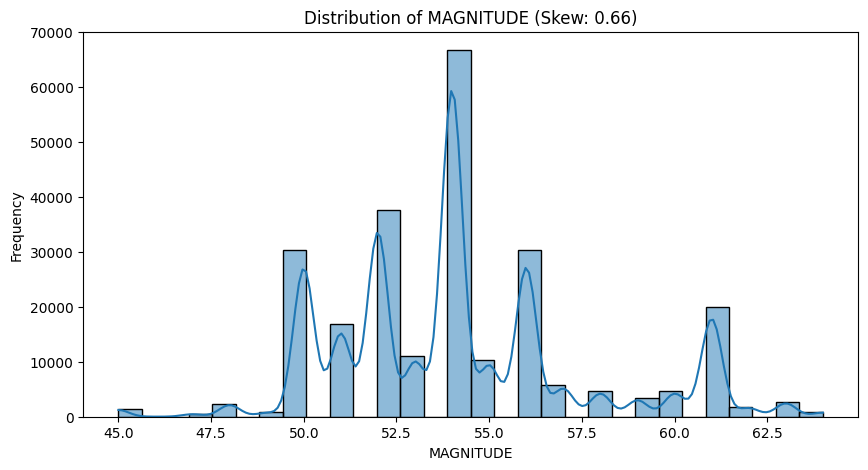

In [61]:
import scipy.stats as stats

# Function to plot histogram with skewness
def plot_skewness(col):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col} (Skew: {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Check skewness for numerical columns
for col in ['ARR_DELAY', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'MAGNITUDE']:
    plot_skewness(col)


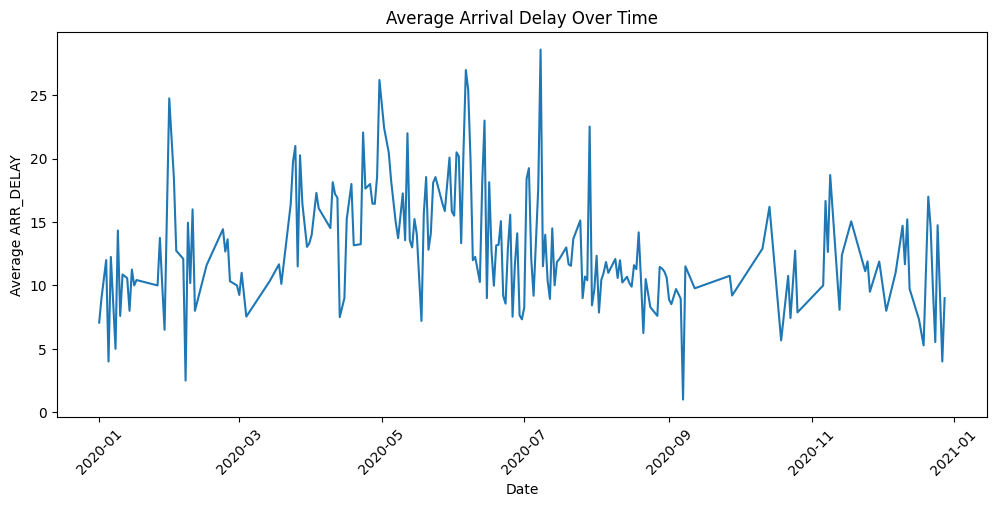

In [62]:
# Convert to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Aggregate average delays per day
df_time_series = df.groupby('date')['ARR_DELAY'].mean().reset_index()

# Line plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='ARR_DELAY', data=df_time_series)
plt.title("Average Arrival Delay Over Time")
plt.xlabel("Date")
plt.ylabel("Average ARR_DELAY")
plt.xticks(rotation=45)
plt.show()


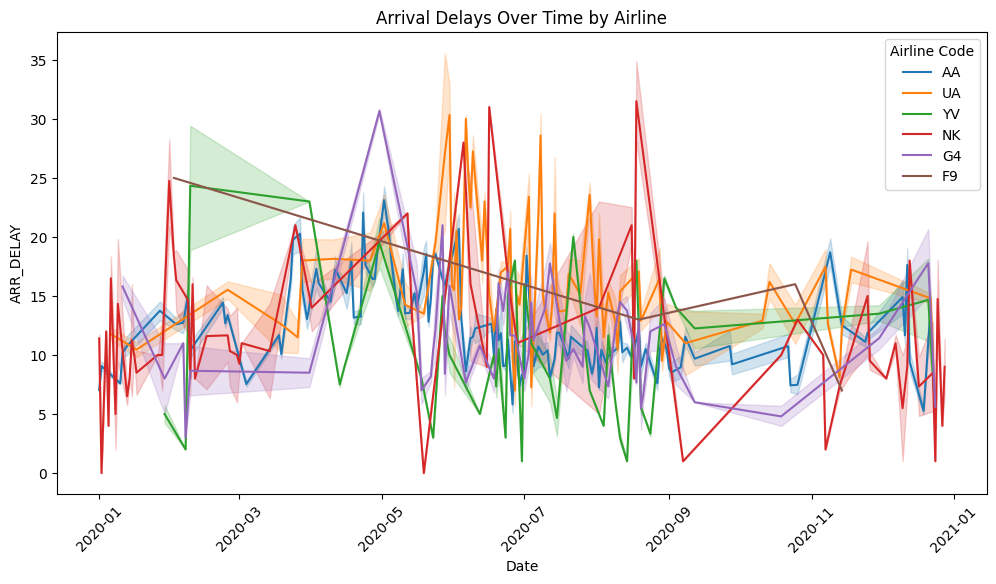

In [63]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='ARR_DELAY', hue='AIRLINE_CODE', data=df)
plt.title("Arrival Delays Over Time by Airline")
plt.xlabel("Date")
plt.ylabel("ARR_DELAY")
plt.xticks(rotation=45)
plt.legend(title="Airline Code", bbox_to_anchor=(1,1))
plt.show()


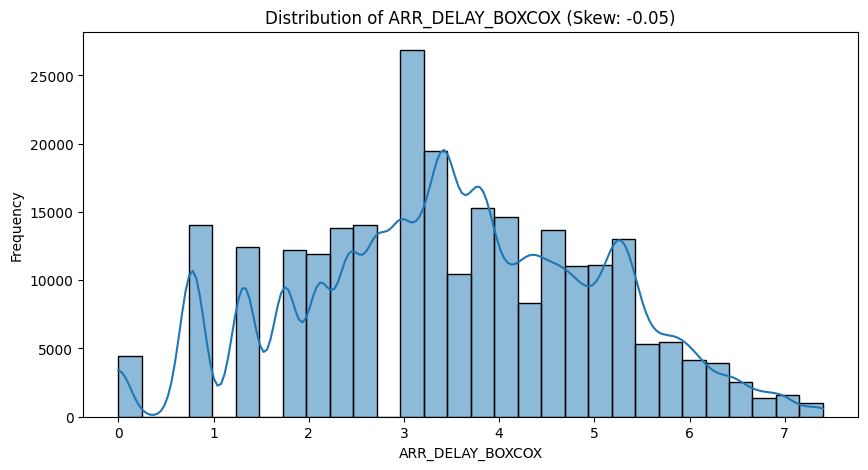

In [64]:
from scipy import stats

df['ARR_DELAY_BOXCOX'], _ = stats.boxcox(df['ARR_DELAY'] + 1)  # Add 1 to avoid zero issues

# Replot skewness
plot_skewness('ARR_DELAY_BOXCOX')
